In [1]:
import pandas as pd
import sklearn

In [2]:
housing_data=pd.read_csv('housing.csv')

## 무작위 추출

In [3]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing_data, test_size=0.2, random_state=42)

In [4]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


## 층화 추출법

- 모집단을 여러개의 층으로 구분하여, 각 층에서 n개씩 랜덤하게 추출하는 방법

- 순수한 무작위 샘플링 방식은 데이터의 크기가 충분히 크지 않은 상황 등 샘플링 편향이 발생할 수 있는 가능성이 생길수 있습니다. 

- 전체 데이터를 계층별 그룹으로 나눈뒤 . 테스트 세트가 전체 데이터의 각 계층의 계수 비율 만큼 샘플링 합니다.

In [5]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
X = np.array([[1,2],[3,4],[1,2],[3,4],[1,2],[3,4]])
y = np.array([0,0,0,1,1,1])
split = StratifiedShuffleSplit(n_splits=10,test_size=0.2,random_state=42)

for train_index , test_index in split.split(X,y):
    print('train_index : ', train_index, 'test_index : ', test_index)

train_index :  [1 5 0 4] test_index :  [3 2]
train_index :  [3 0 2 4] test_index :  [1 5]
train_index :  [0 5 1 4] test_index :  [2 3]
train_index :  [2 3 5 1] test_index :  [4 0]
train_index :  [1 0 3 5] test_index :  [2 4]
train_index :  [1 4 0 3] test_index :  [5 2]
train_index :  [1 5 0 4] test_index :  [3 2]
train_index :  [5 3 0 2] test_index :  [1 4]
train_index :  [1 4 3 0] test_index :  [2 5]
train_index :  [2 3 1 5] test_index :  [0 4]


In [6]:
import numpy as np
housing_data['income_cat']=pd.cut(housing_data.median_income,bins=[0.,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])

In [7]:
housing_data.income_cat

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: income_cat, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

<AxesSubplot:>

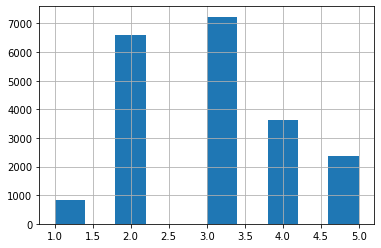

In [8]:
housing_data.income_cat.hist()

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

In [10]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

In [11]:
for train_index, test_index in split.split(housing_data, housing_data["income_cat"]):
    strat_train_set = housing_data.loc[train_index] 
    strat_test_set = housing_data.loc[test_index]

In [12]:
print(train_index)

[12655 15502  2908 ... 19263 19140 19773]


<AxesSubplot:>

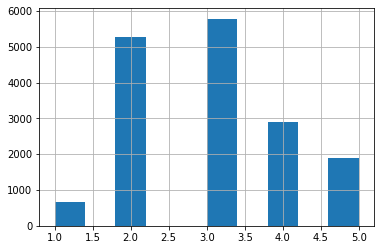

In [13]:
strat_train_set.income_cat.hist()

In [14]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop('income_cat',axis=1,inplace=True)

## 2.5 머신러닝 알고리즘을 위한 데이터 준비

In [15]:
housing=strat_train_set.drop('median_house_value',axis=1)
housing_labels=strat_train_set['median_house_value'].copy()

#### 2.5.1 데이터 정제

# 결측치 처리

- 변수를 삭제
- 샘플을 삭제
- 대체

## imputation

- 1) 범주형 변수 삭제
- 2) imputation 결측치 처리
- 3) 범주형 변수 -> OneHotEncoder 이용해서 변환

In [16]:
from sklearn.impute import KNNImputer

In [17]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [18]:
# 1) 범주형 변수 삭제
housing_num=housing.drop('ocean_proximity',axis=1)

In [19]:
housing_num.head() # 번주형 변수가 삭제된 데이터

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [20]:
#2 결측치 처리
imputer = KNNImputer(n_neighbors=3, weights="uniform")
X=imputer.fit_transform(housing_num)

In [21]:
type(X)

numpy.ndarray

In [22]:
# numpy 형식 -> pandas 
housing_tr=pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)

In [23]:
# 3) 범주형 변수 변환
housing_cat=housing[['ocean_proximity']] # ['ocean_proximity']: DataFrame 유지 시키기 위해

In [24]:
type(housing_cat)

pandas.core.frame.DataFrame

In [25]:
## ordinal -> OrdinalEncoder 
## nominal -> OneHotEncoder

In [26]:
# 범주형 변수 -> 수치형 값으로 바꿔 -> OneHot Encoder로 변환

In [27]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot=encoder.fit_transform(housing_cat)

In [28]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [29]:
encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [30]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [31]:
housing_extra_attribs

array([[-121.46, 38.52, 29.0, ..., 'INLAND', 5.485835694050992,
        3.168555240793201],
       [-117.23, 33.09, 7.0, ..., 'NEAR OCEAN', 6.927083333333333,
        2.6236979166666665],
       [-119.04, 35.37, 44.0, ..., 'INLAND', 5.3933333333333335,
        2.223333333333333],
       ...,
       [-122.72, 38.44, 48.0, ..., '<1H OCEAN', 4.1104651162790695,
        2.6627906976744184],
       [-122.7, 38.31, 14.0, ..., '<1H OCEAN', 6.297405189620759,
        2.411177644710579],
       [-122.14, 39.97, 27.0, ..., 'INLAND', 5.477157360406092,
        3.1725888324873095]], dtype=object)

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', KNNImputer(n_neighbors=3, weights="uniform")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [33]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12442434],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.91050289],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.37190349],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.38157687],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.50723897],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.1250796 ]])

In [34]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs), # tuple(이름, 변환기, 적용될 열 이름 혹은 인덱스)
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [35]:
type(housing_prepared)

numpy.ndarray

## 2.6 모델 선택

In [38]:
# linear regression vs. decision tree

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lin_reg=LinearRegression()

In [41]:
# fit: 학습
# transform:변환
# fit_transform: 학습-> 변환
# predict

In [42]:
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

In [42]:
list(housing_num)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

### 2.6.1 validation approach

In [44]:
some_data=housing.iloc[:5] # test input

In [45]:
some_labels=housing_labels.iloc[:5] # test output

In [46]:
some_data_prepared=full_pipeline.transform(some_data) 

In [47]:
print(lin_reg.predict(some_data_prepared))

[ 83914.79828439 305741.500141   149831.69529706 187700.81371512
 242012.92959394]


In [50]:
from sklearn.metrics import mean_squared_error
housing_predictions=lin_reg.predict(housing_prepared)
lin_mse=mean_squared_error(housing_labels,housing_predictions) 
#training error

In [52]:
print(np.sqrt(lin_mse)) #RMSE

68149.40939079117


In [53]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels) # 모델 학습

DecisionTreeRegressor()

In [54]:
housing_predictions=tree_reg.predict(housing_prepared)
tree_mse=mean_squared_error(housing_labels,housing_predictions)
tree_rmse=np.sqrt(tree_mse) # training error

In [55]:
tree_rmse # 과적합?

0.0

### 2.6.2 cross-validation

In [64]:
from sklearn.model_selection import cross_val_score

In [75]:
# decision tree

In [65]:
from sklearn.tree import DecisionTreeRegressor
tree_reg= DecisionTreeRegressor()
score = cross_val_score(tree_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)

In [73]:
np.sqrt(-score) # -RMSE

array([70777.08322676, 71419.98146416, 69101.0940416 , 73381.3646346 ,
       68651.68290722, 76762.90358067, 72519.67675202, 72954.54800533,
       68900.18979395, 69929.77479461])

In [69]:
np.mean(np.sqrt(-score))

71439.82992009287

In [72]:
np.std(np.sqrt(-score))

2407.8667980075484

In [74]:
# 선형회귀

In [76]:
lin_reg= LinearRegression()
score = cross_val_score(lin_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)

In [77]:
scores = cross_val_score(tree_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)

In [78]:
np.sqrt(-scores) #RMSE

array([71174.84499007, 68574.3913512 , 69729.3906824 , 73499.18003588,
       68133.29414081, 74237.00218687, 71411.21720279, 75641.0878033 ,
       68690.51325021, 71679.01280768])

In [79]:
np.mean(np.sqrt(-scores)) # 선형회귀가 조금 더 좋네??

71276.99344512045

In [80]:
from sklearn.ensemble import RandomForestRegressor
forest_reg= RandomForestRegressor()
score = cross_val_score(forest_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)

In [82]:
np.sqrt(-score) #RMSE

array([51502.04529489, 49156.20723715, 46757.84407204, 51936.95622972,
       47424.71481944, 51248.87619042, 52285.70373087, 49883.16393332,
       48585.13227535, 53784.12143513])

In [83]:
np.mean(np.sqrt(-score))

50256.476521834215